# Deep learning from scratch
author: Jing Zhang    
e-mail: zhangjingnm@hotmail.com    
date: 2024-08    
reference: https://github.com/oreilly-japan/deep-learning-from-scratch

## Perceptron

### What is a perceptron

![A perceptron](./figures/dlscratch_perceptron.png)    
$
y = 
\begin{cases} 
0 &  (w_1 x_1 + w_2 x_2 \leq \theta), \\
1 &  (w_1 x_1 + w_2 x_2 > \theta).
\end{cases}
$
$x$ is input signal, $y$ is output signal, $w$ is weight, it decides the importance of input signal $x$, $\theta$ is threshold.    
Rewrite into:    
$
y = 
\begin{cases} 
0 & (b+ w_1 x_1 + w_2 x_2 \leq 0), \\
1 & (b+ w_1 x_1 + w_2 x_2 > 0).
\end{cases}
$
$b$ is called bias, the value of $b$ decides the neuron is activated easily or not.
### Simple logic circuit

![AND gate](./figures/dlscratch_andgate.png) ![NOTAND gate](./figures/dlscratch_notandgate.png) ![OR gate](./figures/dlscratch_orgate.png) ![XOR gate](./figures/dlscratch_xorgate.png)

In [6]:
# AND gate
import numpy as np

def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1


print('(x1,x2) -> y\nAND gate')
for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = AND(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

(x1,x2) -> y
AND gate
(0, 0) -> 0
(1, 0) -> 0
(0, 1) -> 0
(1, 1) -> 1


In [8]:
# NOTAND gate
import numpy as np

def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

print('(x1,x2) -> y\nNOTAND gate')
for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = NAND(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

(x1,x2) -> y
NOTAND gate
(0, 0) -> 1
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


Single linear    
![OR gate](./figures/dlscratch_orgatecor.png)    
A **linear** line can separate $\triangle$ and $\bigcirc$ in OR gate

In [10]:
# OR gate
import numpy as np

def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([1, 1])
    b = -0.5
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

print('(x1,x2) -> y\nOR gate')
for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = OR(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

(x1,x2) -> y
OR gate
(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 1


### Multiple layer perceptron

![OR gate](./figures/dlscratch_xorgatecor.png) ![XOR gate](./figures/dlscratch_xorgateco.png) ![Multi-layer perceptrion](./figures/dlscratch_perceptronmulti.png)    
A **non-linear** line can separate $\triangle$ and $\bigcirc$ in XOR gate    


In [11]:
# XOR gate
def XOR(x1, x2):
    # overlay different perceptrons like lego
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

print('(x1,x2) -> y\nXOR gate')
for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = XOR(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

(x1,x2) -> y
XOR gate
(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


## Neural networks

### From perceptron to neural networks
A first look at neural network diagram    
![A neural network](./figures/dlscratch_nn.png)    
Review a perceptron:    
![A perceptron](./figures/dlscratch_perceptronbias.png) $
y = 
\begin{cases} 
0 & (b+ w_1 x_1 + w_2 x_2 \leq 0), \\
1 & (b+ w_1 x_1 + w_2 x_2 > 0).
\end{cases}
$
$b$ is called bias, the value of $b$ decides the neuron is activated easily or not.     
Rewrite into: $y=h(b+w_1 x_1 + w_2 x_2)$ and $
h(x) = 
\begin{cases} 
0 & (x \leq 0), \\
1 & (x > 0).
\end{cases}
$

$h(x)$ is
 called **activation function**, to be specific, rewrite the function above as: $a=b+w_1 x_1 + w_2 x_2$ and $y=h(a)$, a diagram shows below:    
![A perceptron](./figures/dlscratch_perceptronbiasact.png) 




### Activation functions
#### Sigmoid function
$$ h(x)=\frac{1}{1+e^{-x}}  $$


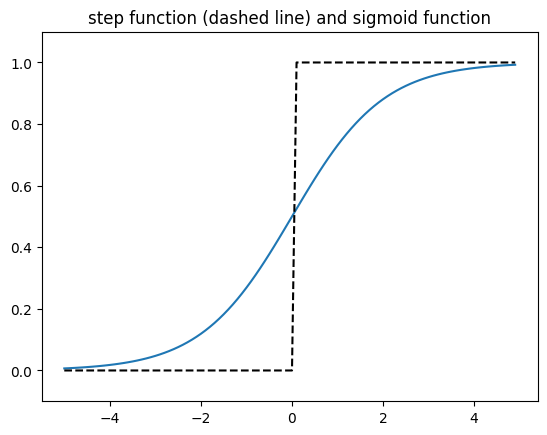

In [15]:
# step function and sigmoid function
import numpy as np
import matplotlib.pylab as plt

# sigmoid function is used in neural networks, for smooth change
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# step function is used in perceptron, for rapid signal changes
def step_function(x):
    return np.array(x > 0, dtype=int)

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = step_function(x)

plt.plot(x, y1)
plt.plot(x, y2, 'k--')
plt.ylim(-0.1, 1.1) 
plt.title('step function (dashed line) and sigmoid function')
plt.show()

#### ReLU function
$$
h(x) = 
\begin{cases} 
0 & (x \leq 0), \\
x & (x > 0).
\end{cases}
$$

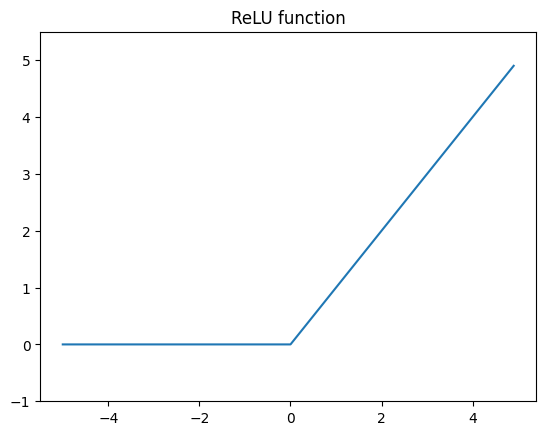

In [16]:
# ReLU function
import numpy as np
import matplotlib.pylab as plt

def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.title('ReLU function')
plt.show()

### Multidimensional arrays
The number of columns of first array should be same as the the number of rows of second array.    
For example: (3x2)*(2x4)=3x4

In [41]:
import numpy as np 
# one dimension array
A = np.array([1, 2, 3, 4])
print(f'array A: {A} \nA.ndim: {A.ndim} A.shape: {A.shape} A.shape[0]: {A.shape[0]}')
# two dimension array (matrix)
B = np.array([[1,2], [3,4], [5,6]])
print(f'array B:\n {B}\nB.ndim: {B.ndim} B.shape: {B.shape} B.shape[0]: {B.shape[0]} B.shape[1]: {B.shape[1]}\n')

# multiply or dot
A = np.array([[1,2,3], [4,5,6]])
B = np.array([[1,2], [3,4], [5,6]])
print(f'Matrix dot product\n A.shape {A.shape} B.shape {B.shape} \ndot(A,B).shape {np.dot(A,B).shape}\n \
np.dot(A,B)\n {np.dot(A,B)} \nnp.dot(B,A)\n {np.dot(B,A)} \ndot(B,A).shape {np.dot(B,A).shape}')

array A: [1 2 3 4] 
A.ndim: 1 A.shape: (4,) A.shape[0]: 4
array B:
 [[1 2]
 [3 4]
 [5 6]]
B.ndim: 2 B.shape: (3, 2) B.shape[0]: 3 B.shape[1]: 2

Matrix dot product
 A.shape (2, 3) B.shape (3, 2) 
dot(A,B).shape (2, 2)
 np.dot(A,B)
 [[22 28]
 [49 64]] 
np.dot(B,A)
 [[ 9 12 15]
 [19 26 33]
 [29 40 51]] 
dot(B,A).shape (3, 3)


Dot product of a neural networks    
![dot product of a neural networks](./figures/dlscratch_nndot.png)    


In [43]:
# a one layer neural network
X = np.array([1, 2]) # input elements
W = np.array([[1, 3, 5], [2, 4, 6]]) # weights of each element
Y = np.dot(X, W) # output
print(Y)

[ 5 11 17]


### A 3-layer neural networks

![From input to 1st layer](./figures/dlscratch_nn3layer1.png)
From input to 1st layer    
![From 1st to 2nd layer](./figures/dlscratch_nn3layer2.png)
From 1st to 2nd layer    
![From 2nd to output layer](./figures/dlscratch_nn3layer3.png)
From 2nd to output layer

In [2]:
import numpy as np

def init_network():
    network = {} # a dictionary including keys such as weights and bias
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network

def identity_function(x):
    # used for regression
    return x

def sigmoid(x):
    # used for binary classification
    return 1 / (1 + np.exp(-x))

def forward(network, x):
    # x is input elements
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y) # [ 0.31682708 0.69627909]

[0.31682708 0.69627909]


### Output layer

Regression problem uses idendity function;    
Classification problem uses softmax function, output becomes probability, sum is 1. Because softmax funciton doesn't change output distribution, sometimes softmax function can be neglected in classification problem so that less computation time and memory.
$$y_k = \frac{e^{a_k}}{\sum_{i=1}^n e^{a_i}}$$

The number of output layer depends on tasks, for instance, number classification has 10 classes, gender classification has 2 classes in general (here we don't consider LBGTQ~)

In [16]:
# softmax function
import numpy as np

a = np.array([0.3, 2.9, 901.0])
print(f'array a {a}')
exp_a = np.exp(a)
print(f'exp of a {exp_a}')
sum_exp_a = np.sum(exp_a)
print(f'sum_exp_a {sum_exp_a}')
y = exp_a / sum_exp_a
print(f'y {y}')

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # avoid overflow
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y
print(f'softmax(a) after overflow preventing {softmax(a)}')

array a [3.00e-01 2.90e+00 9.01e+02]
exp of a [ 1.34985881 18.17414537         inf]
sum_exp_a inf
y [ 0.  0. nan]
softmax(a) after overflow preventing [0. 0. 1.]


C:\Users\zhang\AppData\Local\Temp\ipykernel_31224\3256760056.py:6: RuntimeWarning: overflow encountered in exp
  exp_a = np.exp(a)
C:\Users\zhang\AppData\Local\Temp\ipykernel_31224\3256760056.py:10: RuntimeWarning: invalid value encountered in divide
  y = exp_a / sum_exp_a


### Handwritten digital number recognition

x_train.shape (60000, 784) y_train.shape (60000,) x_test.shape (10000, 784) y_test.shape (10000,)
img.shape (784,) label 5
img.shape after reshape (28, 28)


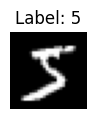

In [36]:
import sys, os
sys.path.append(os.pardir)  # Settings for importing files from a parent directory
import numpy as np
from dataset.mnist import load_mnist

# load dataset
(x_train, y_train), (x_test, y_test) = load_mnist(flatten=True, normalize=False, one_hot_label=False)

# show dataset info
print(f'x_train.shape {x_train.shape} y_train.shape {y_train.shape} x_test.shape {x_test.shape} y_test.shape {y_test.shape}') 

# show one image and label
img = x_train[0]
label = y_train[0]
print(f'img.shape {img.shape} label {label}')  # (784,) 5

img = img.reshape(28, 28)  
print(f'img.shape after reshape {img.shape}')  # (28, 28)

plt.figure(figsize=(1, 1)) # inch
plt.imshow(img, cmap='gray')
plt.title(f'Label: {label}')
plt.axis('off') 
plt.show()

In [37]:
import sys, os
sys.path.append(os.pardir) # Settings for importing files from a parent directory
import numpy as np
import pickle # used to save object into a file, or vice versa
from dataset.mnist import load_mnist

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # avoid overflow
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("dataset/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # Get the index of the most probable element
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [41]:
# shape check
W1, W2, W3 = network['W1'], network['W2'], network['W3']
print(f'X {x[0].shape} -> W1 {W1.shape} -> W2 {W2.shape} -> W3 {W3.shape} -> y {y.shape}')

X (784,) -> W1 (784, 50) -> W2 (50, 100) -> W3 (100, 10) -> y (10,)


Batch processing

In [43]:
import sys, os
sys.path.append(os.pardir)  # Settings for importing files from a parent directory
import numpy as np
import pickle
from dataset.mnist import load_mnist


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("dataset/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, w3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()

batch_size = 100 
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1) # axis = 0 is column, 1 is row, here y_batch (100, 10), means take the max value in each row
    accuracy_cnt += np.sum(p == t[i:i+batch_size]) # is same, return true, or return false, then sum the number of trues

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))


Accuracy:0.9352


In [46]:
# shape check
W1, W2, W3 = network['W1'], network['W2'], network['W3']
print(f'x_batch {x_batch.shape} -> W1 {W1.shape} -> W2 {W2.shape} -> W3 {W3.shape} -> y_batch {y_batch.shape}')

x_batch (100, 784) -> W1 (784, 50) -> W2 (50, 100) -> W3 (100, 10) -> y_batch (100, 10)


## Learning neural networks
The "learning" mentioned here refers to the process of automatically obtaining the optimal weight parameters from the training data.
![From human to machine learning to deep learning](./figures/dlscratch_humanmldl.png)

### Learn from data
The neural networks learn from **training data**, to test the **generalization** of model, model test on **test data**, model can hav **over fitting** state if the model behave good only on specific dataset.

### Loss functions
**Loss function** is a index that shows how bad/good a model's performance is.
For example, **mean squared error**:
$$ E = \sum_k(y_k-t_k)^2 $$
$y$ is output of model, $t$ is labeled data, $k$ is dimension, for instance, $k=10$ in digital number    
**Cross entropy error** is defined as:
$$E=-\sum_k t_k \log y_k$$
mean that the higher prediction, the lower the cross entropy error.

Why need loss funcion    
* The aim is to find best weights of neural networks automatically.
* The recognition accuracy has little response to small parameter changes. Even if it does, its value changes discontinuously and suddenly.
* Instead of accuracy, loss changes continuesly.
* Similarly, activation function like step function can not make neural network learn, because most of time it's 0.
* Instead, sigmoid function is smooth, and the gradient is not 0, which is good for model to learn.

In [14]:
# mean squared error for one number
import numpy as np

def mean_squared_error(y, t):
    return np.sum((y-t)**2)

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # one hot label of 2
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0] # predict probability
error = mean_squared_error(np.array(y), np.array(t)) # error or loss
print(f'mse error {error:.3f} of t {t} and y {y}')
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
error = mean_squared_error(np.array(y), np.array(t))
print(f'mse error {error:.3f} of t {t} and y {y}')
print()
# cross entropy loss for one number
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
error_cel = cross_entropy_error(np.array(y), np.array(t))
print(f'cel loss: {error_cel:.3f} of t {t} and y {y}')
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
error_cel = cross_entropy_error(np.array(y), np.array(t))
print(f'cel loss: {error_cel:.3f} of t {t} and y {y}')


mse error 0.195 of t [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] and y [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
mse error 1.195 of t [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] and y [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

cel loss: 0.511 of t [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] and y [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cel loss: 2.303 of t [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] and y [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]


batch based loss
$$E=-\frac{1}{N}\sum_n\sum_k t_{nk} \log y_{nk}$$
$N$ is the batch size

In [29]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
load_mnist(normalize=True, one_hot_label=True)
print(f'x_train.shape {x_train.shape} t_train.shape {t_train.shape}') # (60000, 784) (60000, 10)

train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size) # random pick 10 numbers in training set
print(f'batch mask {batch_mask}')
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

# cross entropy error for batch number, one-hot label
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

# cross entropy error for batch number, non one-hot label
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

# explain for np.log(y[np.arange(batch_size), t] + 1e-7)
batch_size = 5
np.arange(batch_size)

# t ensures that only correct class probability values ​​are used in the calculation.
t = [2,7,0,9,4] # non one-hot label
y = np.array([
    [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0],
    [0.1, 0.05, 0.0, 0.0, 0.05, 0.1, 0.0, 0.1, 0.6, 0.0],
    [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0],
    [0.1, 0.05, 0.0, 0.0, 0.05, 0.1, 0.6, 0.1, 0.0, 0.0],
    [0.1, 0.05, 0.1, 0.0, 0.55, 0.1, 0.0, 0.1, 0.0, 0.0]
])  # predictions from model

print(f'\nnp.arange(batch_size) {np.arange(batch_size)} \n\t\t    t {t}')

coordinates = [f'y[{i},{t[i]}]' for i in range(batch_size)]
print(f'\ncoordinates {coordinates}')

print(f'y = np.array shape {y.shape} \n{y}')
print(f'\ny[np.arange(batch_size),t] {y[np.arange(batch_size), t]}')

x_train.shape (60000, 784) t_train.shape (60000, 10)
batch mask [45175 41462 47670 47477  3560 55597 23771  6682 47686 41518]

np.arange(batch_size) [0 1 2 3 4] 
		    t [2, 7, 0, 9, 4]

coordinates ['y[0,2]', 'y[1,7]', 'y[2,0]', 'y[3,9]', 'y[4,4]']
y = np.array shape (5, 10) 
[[0.1  0.05 0.6  0.   0.05 0.1  0.   0.1  0.   0.  ]
 [0.1  0.05 0.   0.   0.05 0.1  0.   0.1  0.6  0.  ]
 [0.1  0.05 0.1  0.   0.05 0.1  0.   0.6  0.   0.  ]
 [0.1  0.05 0.   0.   0.05 0.1  0.6  0.1  0.   0.  ]
 [0.1  0.05 0.1  0.   0.55 0.1  0.   0.1  0.   0.  ]]

y[np.arange(batch_size),t] [0.6  0.1  0.1  0.   0.55]


### Numerical differentiation

### Gradient

## Back propagation

## Tricks for learning

## CNN

## Deep learning